<a href="https://colab.research.google.com/github/Ayuniarfina/Final-Project-Bangkit---JKT4-B/blob/Deni-branch/basemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Base model

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [190]:
import zipfile
zipref = zipfile.ZipFile('/content/gdrive/My Drive/Data Colab/faceexp.zip')
zipref.extractall('/tmp/dataset')

In [191]:
import tensorflow as tf
import collections

In [203]:
train_dir = ('/tmp/dataset/images/images/train')
test_dir = ('/tmp/dataset/images/images/validation')

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

traingenerator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical'
)

testgenerator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    class_mode='categorical',
    shuffle=False
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


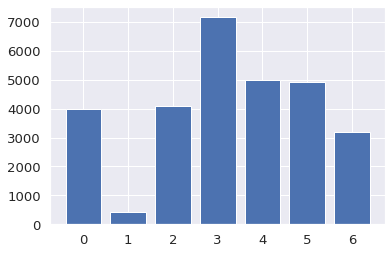

Counter({3: 7164, 4: 4982, 5: 4938, 2: 4103, 0: 3993, 6: 3205, 1: 436})


In [199]:
trainset = collections.Counter(traingenerator.classes)
plt.bar(trainset.keys(), trainset.values())
plt.show()
print(trainset)

In [193]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(48,48,3)),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dense(7, activation='softmax')
])

#model.summary()

In [194]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
history = model.fit(traingenerator, validation_data=testgenerator, epochs=30)

Epoch 1/30
901/901 [==============================] - 17s 18ms/step - loss: 1.7137 - acc: 0.3125 - val_loss: 1.5858 - val_acc: 0.3879
Epoch 2/30
901/901 [==============================] - 16s 18ms/step - loss: 1.5528 - acc: 0.3996 - val_loss: 1.5174 - val_acc: 0.4206
Epoch 3/30
901/901 [==============================] - 16s 18ms/step - loss: 1.4802 - acc: 0.4298 - val_loss: 1.4696 - val_acc: 0.4440
Epoch 4/30
901/901 [==============================] - 16s 18ms/step - loss: 1.4258 - acc: 0.4492 - val_loss: 1.4436 - val_acc: 0.4418
Epoch 5/30
901/901 [==============================] - 16s 18ms/step - loss: 1.3825 - acc: 0.4684 - val_loss: 1.3956 - val_acc: 0.4684
Epoch 6/30
901/901 [==============================] - 16s 18ms/step - loss: 1.3507 - acc: 0.4820 - val_loss: 1.3781 - val_acc: 0.4766
Epoch 7/30
901/901 [==============================] - 16s 18ms/step - loss: 1.3194 - acc: 0.4952 - val_loss: 1.3542 - val_acc: 0.4826
Epoch 8/30
901/901 [==============================] - 16s 18ms

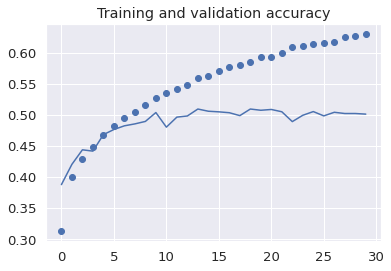

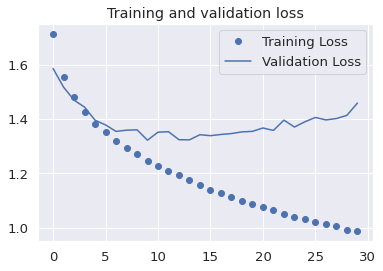

In [200]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [201]:
# Evaluate Model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [204]:
# Using test generator dataset
Y_pred = model.predict(testgenerator)
y_pred = np.argmax(Y_pred, axis=1)

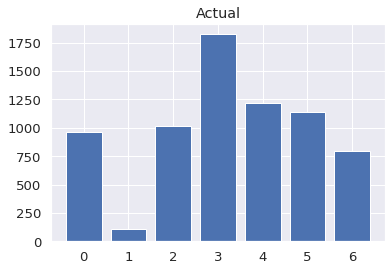

actual : Counter({3: 1825, 4: 1216, 5: 1139, 2: 1018, 0: 960, 6: 797, 1: 111})


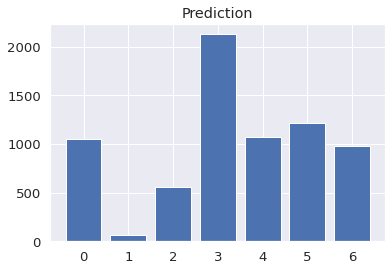

prediction : Counter({3: 2128, 5: 1212, 4: 1073, 0: 1048, 6: 982, 2: 561, 1: 62})


In [210]:
plt.bar(actual.keys(), actual.values())
plt.title('Actual')
plt.show()
actual = collections.Counter(testgenerator.classes)
print('actual :', collections.Counter(testgenerator.classes))
plt.figure()
plt.bar(prediction.keys(), prediction.values())
plt.title('Prediction')
plt.show()
prediction = collections.Counter(y_pred)
print('prediction :', collections.Counter(y_pred))

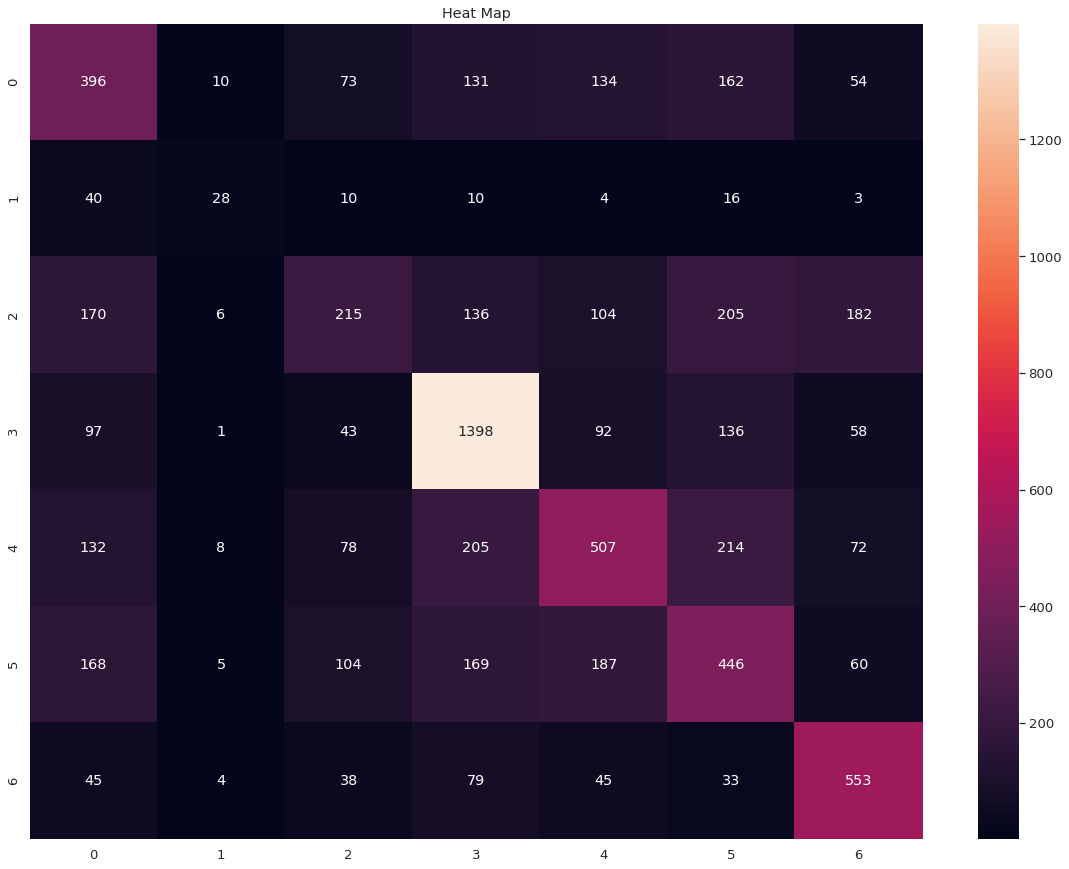

In [211]:
import seaborn as sn
import pandas as pd

array= confusion_matrix(testgenerator.classes,y_pred)

plt.subplots(figsize=(20,15))
df_cm=pd.DataFrame(array, range(7),range(7))
sn.set(font_scale=1.2)
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Heat Map')
plt.show()

In [212]:
# Classification Report

target_names = ['angry','disgust','fear','happy','neutral','sad','surprise']
print(classification_report(testgenerator.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       angry       0.38      0.41      0.39       960
     disgust       0.45      0.25      0.32       111
        fear       0.38      0.21      0.27      1018
       happy       0.66      0.77      0.71      1825
     neutral       0.47      0.42      0.44      1216
         sad       0.37      0.39      0.38      1139
    surprise       0.56      0.69      0.62       797

    accuracy                           0.50      7066
   macro avg       0.47      0.45      0.45      7066
weighted avg       0.49      0.50      0.49      7066



In [188]:
#tf.keras.backend.clear_session()
#del history

NameError: ignored